In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autism-screening-for-toddlers/Toddler Autism dataset July 2018.csv
/kaggle/input/autism-screening-for-toddlers/Autism_Screening_Data_Combined.csv
/kaggle/input/autism-screening-for-toddlers/Toddler data description.docx


In [2]:
# Table 1: Details of variables mapping to the Q-Chat-10
# screening methods.
# Variable in Dataset	Corresponding
# Q-chat-10-Toddler Features

**Question that have been asked by the childs .**


A1	 Does your child look at you when you call his/her name?

A2	How easy is it for you to get eye contact with your child? 

A3	Does your child point to indicate that s/he wants something? (e.g. a toy that is 
out of reach) 
                  
A4	Does your child point to share interest with you? (e.g. poin9ng at an 
interes9ng sight) 

A5	Does your child pretend? (e.g. care for dolls, talk on a toy phone) 

A6	Does your child follow where you’re looking? 

A7	If you or someone else in the family is visibly upset, does your child show signs 
of wan9ng to comfort them? (e.g. stroking hair, hugging them)

A8	Would you describe your child’s first words as: 

A9	Does your child use simple gestures? (e.g. wave goodbye) 

A10	Does your child stare at nothing with no apparent purpose? 



# Data Preprocessing

In [3]:
v = pd.read_csv("/kaggle/input/autism-screening-for-toddlers/Toddler Autism dataset July 2018.csv")

In [4]:
v.head(20)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


In [5]:
v = v.drop(["Ethnicity" , "Who completed the test"], axis=1)


In [6]:
v

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,yes,no,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,yes,no,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,yes,no,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,no,no,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,no,yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,no,yes,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,yes,no,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,yes,no,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,no,yes,No


**operation for nan values**

**we can see  there is no nan values**

In [7]:
v.isnull().sum()

Case_No                0
A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Qchat-10-Score         0
Sex                    0
Jaundice               0
Family_mem_with_ASD    0
Class/ASD Traits       0
dtype: int64

encoding asd traits 

In [8]:

#  converting all the values into the string , stripping and making into 
# lower case ...

v["Class/ASD Traits "] = (
    v["Class/ASD Traits "]
    .astype(str)       # converting every values into string 
    .str.strip()       #  removing extra spaces
    .str.lower()       #  changing into the lower case
)

# which condition fullfills we are making Yes and others into NO..


v["Class/ASD Traits "] = (v["Class/ASD Traits "] == "yes").astype(int)

# Unique values check
print(v["Class/ASD Traits "].unique())


[0 1]



**encoding sex categorical column into binary**

In [9]:

v["Sex"] = (v["Sex"] == "m").astype(int)

#  males are represented by 1
# females are by 0 



In [10]:
v["Sex"].value_counts()

Sex
1    735
0    319
Name: count, dtype: int64

In [11]:
v["Sex"].value_counts(normalize=True) * 100
# in our dataset 69 percent are males and rest are females 

Sex
1    69.734345
0    30.265655
Name: proportion, dtype: float64

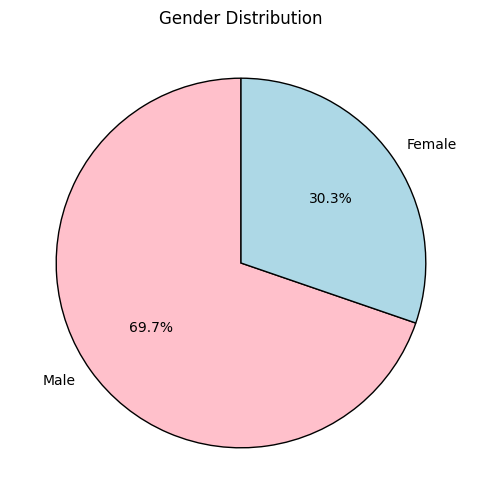

In [12]:
import matplotlib.pyplot as plt

# Gender percentage
sex_percent = v["Sex"].value_counts(normalize=True) * 100

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(sex_percent, labels=sex_percent.index.map({0:"Female", 1:"Male"}),
        autopct="%.1f%%", startangle=90, colors=["pink","lightblue"],
        wedgeprops={'edgecolor':'black'})
plt.title("Gender Distribution")
plt.show()


In [13]:
v.groupby("Sex")["Class/ASD Traits "].mean() * 100


Sex
0    60.815047
1    72.653061
Name: Class/ASD Traits , dtype: float64

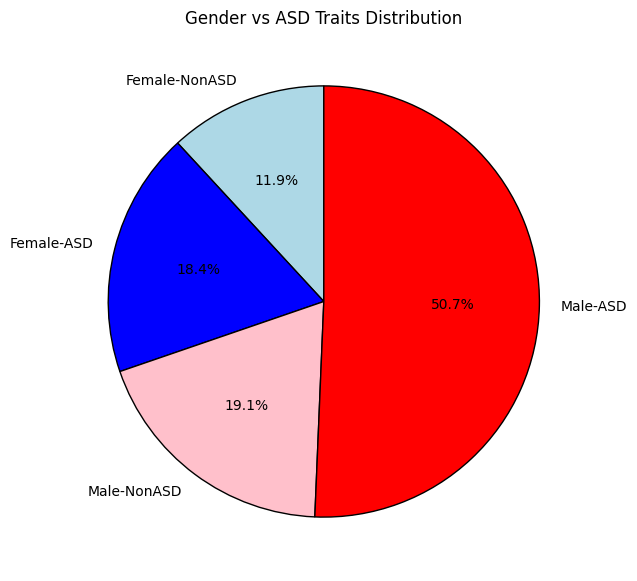

In [14]:
import matplotlib.pyplot as plt

# Group by sex & ASD traits
ct = v.groupby(["Sex", "Class/ASD Traits "]).size().reset_index(name="count")

# Labels dynamic banao
ct["label"] = ct.apply(lambda x: 
                       ("Male" if x["Sex"]==1 else "Female") + 
                       ("-ASD" if x["Class/ASD Traits "]==1 else "-NonASD"), axis=1)

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(ct["count"], labels=ct["label"], autopct="%.1f%%", startangle=90, 
        colors=["lightblue","blue","pink","red"], wedgeprops={'edgecolor':'black'})
plt.title("Gender vs ASD Traits Distribution")
plt.show()


In [15]:
v.head(5) 

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,yes,no,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,yes,no,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,yes,no,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,no,no,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,no,yes,1


**encoding family men into binary form**

In [16]:
v["Family_mem_with_ASD"] = (v["Family_mem_with_ASD"] == "yes").astype(int)

**encoding jaundice into binary form**

In [17]:
v["Jaundice"] = (v["Jaundice"] == "yes").astype(int)

In [18]:
v["Jaundice"].value_counts() 

Jaundice
0    766
1    288
Name: count, dtype: int64

In [19]:
print(v.columns.tolist())

# can see all the features of our datsets

['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score', 'Sex', 'Jaundice', 'Family_mem_with_ASD', 'Class/ASD Traits ']


**cleaning the asd traits column name**

**Here we are finding out the correlation between inputs features to asd traits features**

In [20]:
corr = v.corr()["Class/ASD Traits "]

In [21]:
corr

#  can say by this observence that 

#  "Q chat score" 

# has extreme correlation to the asd traits 


Case_No                0.079966
A1                     0.503810
A2                     0.463467
A3                     0.409701
A4                     0.505204
A5                     0.563297
A6                     0.569424
A7                     0.563177
A8                     0.427155
A9                     0.577336
A10                    0.179833
Age_Mons               0.066831
Qchat-10-Score         0.810423
Sex                    0.117664
Jaundice               0.074060
Family_mem_with_ASD   -0.013503
Class/ASD Traits       1.000000
Name: Class/ASD Traits , dtype: float64

**correlation by using  heatmap**

****

# Exploratory Data Analysis

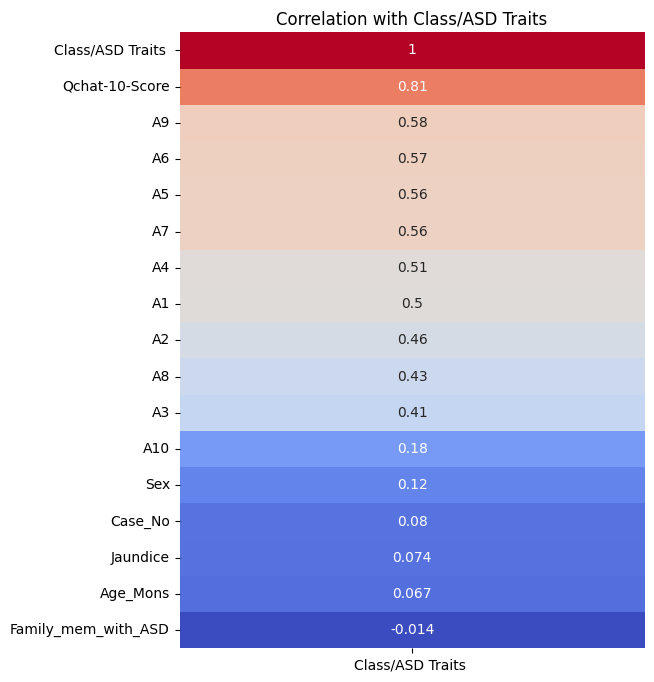

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corr = v.corr()

# correlation in the respect of heatmap 
plt.figure(figsize=(6,8))
sns.heatmap(corr[["Class/ASD Traits "]].sort_values(by="Class/ASD Traits ", ascending=False), 
            annot=True, cmap="coolwarm", cbar=False)

plt.title("Correlation with Class/ASD Traits")
plt.show()


> **Distribution of ASd traits**

In [23]:
v["Class/ASD Traits "].value_counts(normalize=True) * 100

Class/ASD Traits 
1    69.070209
0    30.929791
Name: proportion, dtype: float64

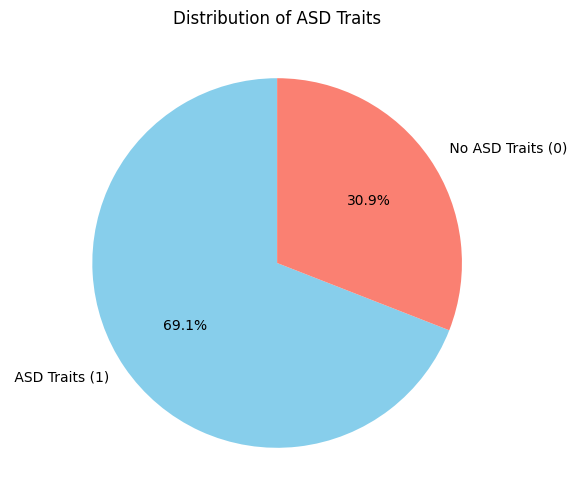

In [24]:
import matplotlib.pyplot as plt

# Value counts (0 = No ASD Traits, 1 = ASD Traits)
counts = v["Class/ASD Traits "].value_counts()

# Labels
labels = [" ASD Traits (1)", " No ASD Traits (0)"]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct="%.1f%%", startangle=90, colors=["skyblue", "salmon"])
plt.title("Distribution of ASD Traits")
plt.show()


**Q chat score analysis in respect to autism traits**

In [25]:
# by this observence we can say that after having 3 score 
# the child have the autism traits

Class/ASD Traits    0    1
Qchat-10-Score            
0                  54    0
1                  88    0
2                  88    0
3                  96    0
4                   0  110
5                   0  120
6                   0   96
7                   0  135
8                   0   97
9                   0   95
10                  0   75


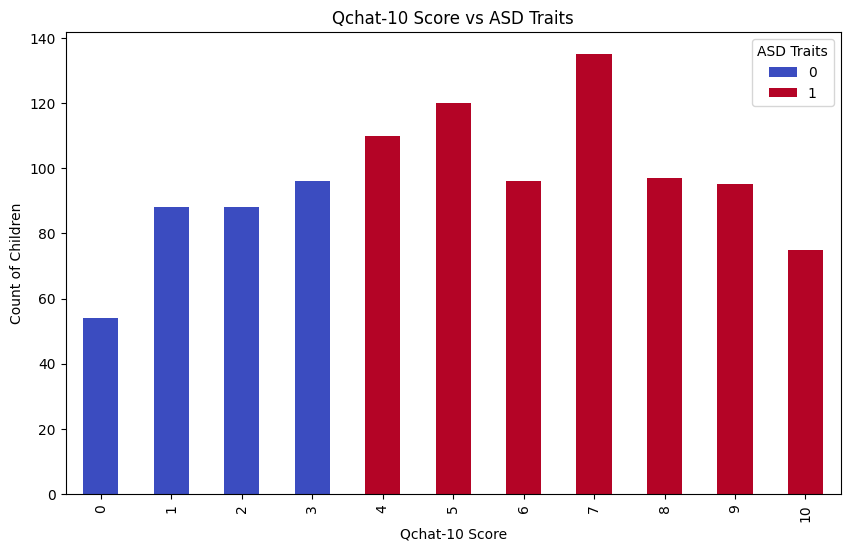

In [26]:
import matplotlib.pyplot as plt

# Grouping: har score pe kitne ASD=0 aur ASD=1 hain
score_relation = v.groupby(["Qchat-10-Score", "Class/ASD Traits "]).size().unstack(fill_value=0)

print(score_relation)

# Stacked bar plot
score_relation.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")

plt.title("Qchat-10 Score vs ASD Traits")
plt.xlabel("Qchat-10 Score")
plt.ylabel("Count of Children")
plt.legend(title="ASD Traits")
plt.show()



In [27]:
v.select_dtypes(include='number').corr()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
Case_No,1.000000,0.050828,-0.002668,0.082087,0.073426,0.055263,0.041315,0.087687,0.023916,0.069870,-0.027257,0.027098,0.077110,0.066949,-0.002757,-0.013243,0.079966
A1,0.050828,1.000000,0.463227,0.244362,0.247524,0.284808,0.373083,0.332705,0.208197,0.322226,0.130966,0.040508,0.614064,0.111508,-0.005613,0.053020,0.503810
A2,-0.002668,0.463227,1.000000,0.206927,0.265867,0.259105,0.309461,0.294314,0.251865,0.268784,0.157498,0.037744,0.592424,0.067086,0.046039,0.034800,0.463467
A3,0.082087,0.244362,0.206927,1.000000,0.547100,0.349086,0.297719,0.211375,0.243758,0.379129,0.003848,-0.109880,0.592885,0.063299,-0.006874,0.040913,0.409701
A4,0.073426,0.247524,0.265867,0.547100,1.000000,0.348459,0.347693,0.318546,0.251504,0.427683,0.016872,-0.087873,0.642890,0.105087,0.027464,-0.036625,0.505204
A5,0.055263,0.284808,0.259105,0.349086,0.348459,1.000000,0.415309,0.348913,0.316661,0.441892,0.045347,0.018448,0.649518,0.129724,0.025135,-0.021662,0.563297
A6,0.041315,0.373083,0.309461,0.297719,0.347693,0.415309,1.000000,0.361758,0.280556,0.416213,0.072162,0.065907,0.659377,0.025144,-0.004882,0.046654,0.569424
A7,0.087687,0.332705,0.294314,0.211375,0.318546,0.348913,0.361758,1.000000,0.257228,0.360686,0.175114,0.021442,0.619053,0.044680,0.048327,-0.024248,0.563177
A8,0.023916,0.208197,0.251865,0.243758,0.251504,0.316661,0.280556,0.257228,1.000000,0.293457,0.082004,0.080505,0.543229,0.076609,0.003202,-0.036569,0.427155
A9,0.069870,0.322226,0.268784,0.379129,0.427683,0.441892,0.416213,0.360686,0.293457,1.000000,0.028710,-0.048650,0.671638,0.087463,0.012801,-0.011486,0.577336


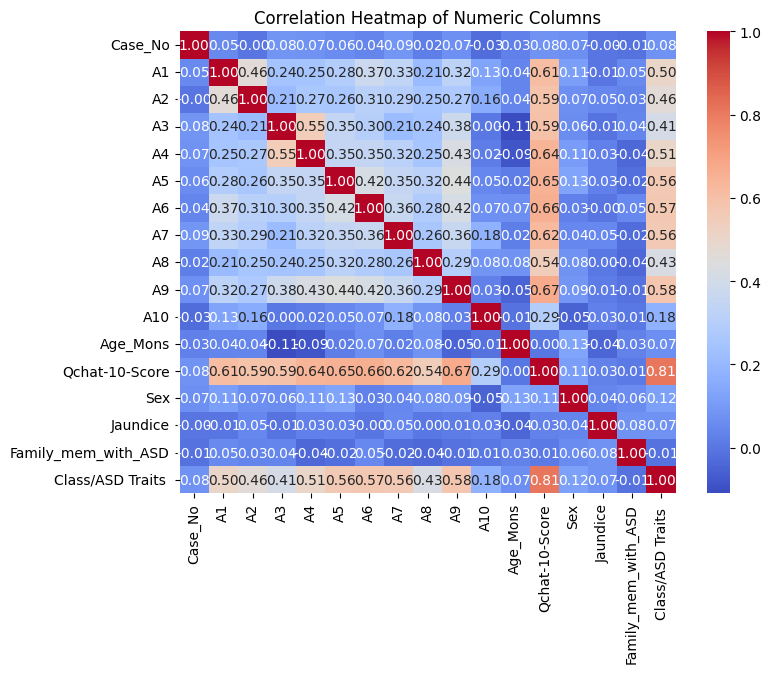

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric columns ka correlation matrix
corr_matrix = v.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


Qchat-10 Score vs ASD Traits Relation:
Class/ASD Traits    0    1
Qchat-10-Score            
0                  54    0
1                  88    0
2                  88    0
3                  96    0
4                   0  110
5                   0  120
6                   0   96
7                   0  135
8                   0   97
9                   0   95
10                  0   75


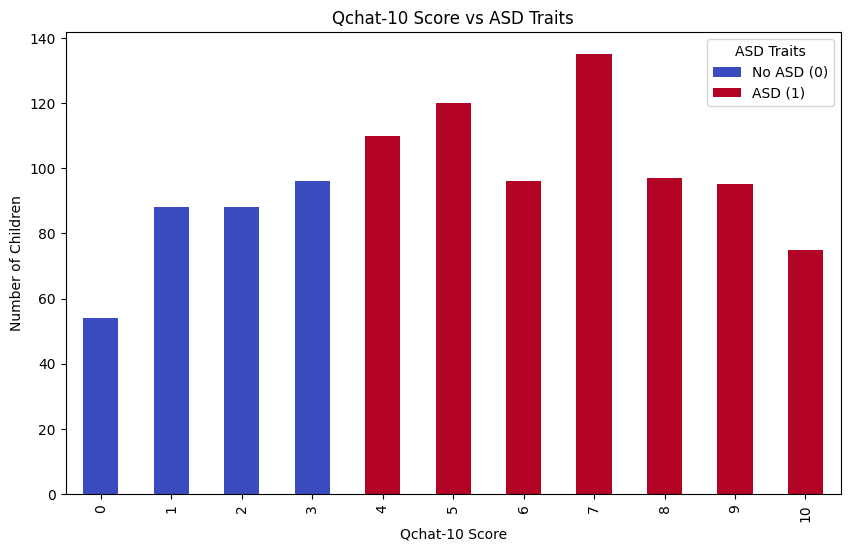

In [29]:
import matplotlib.pyplot as plt

# Relation table: har score pe ASD=0 aur ASD=1 count
score_relation = v.groupby(["Qchat-10-Score", "Class/ASD Traits "]).size().unstack(fill_value=0)

print("Qchat-10 Score vs ASD Traits Relation:")
print(score_relation)

# Plot stacked bar chart
score_relation.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")

plt.title("Qchat-10 Score vs ASD Traits")
plt.xlabel("Qchat-10 Score")
plt.ylabel("Number of Children")
plt.legend(title="ASD Traits", labels=["No ASD (0)", "ASD (1)"])
plt.show()


**finding out how much questions has strong correlaion with class asd traits**

In [30]:
# giving features ...
features = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10"]

# Correlation with Class/ASD Traits
corr_with_target = v[features + ["Class/ASD Traits "]].corr()["Class/ASD Traits "].drop("Class/ASD Traits ")

print("Correlation of each question with ASD Traits:")
print(corr_with_target)

# here each questions having strong correlation with asd traits 
#  but  question a9 has most strong correlation ....


Correlation of each question with ASD Traits:
A1     0.503810
A2     0.463467
A3     0.409701
A4     0.505204
A5     0.563297
A6     0.569424
A7     0.563177
A8     0.427155
A9     0.577336
A10    0.179833
Name: Class/ASD Traits , dtype: float64


In [31]:
features = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10"]

impact = {}
for q in features:
    # Jab question = 1 (Yes), ASD Traits ka average
    impact[q] = v[v[q] == 1]["Class/ASD Traits "].mean()

print("Probability of ASD Traits if question answered Yes:")
for k, v_ in impact.items():
    print(f"{k}: {v_:.2f}")






#      by this analysis if question 9 is answered . then strong 
#             possibility for having the  asd traits.

                   # A9 question

#   Does your child use simple gestures? (e.g. wave goodbye)



Probability of ASD Traits if question answered Yes:
A1: 0.90
A2: 0.93
A3: 0.92
A4: 0.92
A5: 0.94
A6: 0.92
A7: 0.88
A8: 0.90
A9: 0.96
A10: 0.76


question A1:
       Does your child look at you when you call his/her name?


question A5 :
       Does your child pretend? (e.g. care for dolls, talk on a toy phone)

question A6 : 
      Does your child follow where you’re looking?

question A7:
     If you or someone else in the family is visibly upset, does your child show    signs of wan9ng to comfort them? (e.g. stroking hair, hugging them)


A7     64.990512
A10    58.633776
A6     57.685009
A1     56.356736
A5     52.466793
A4     51.233397
A9     48.956357
A8     45.920304
A2     44.876660
A3     40.132827
dtype: float64


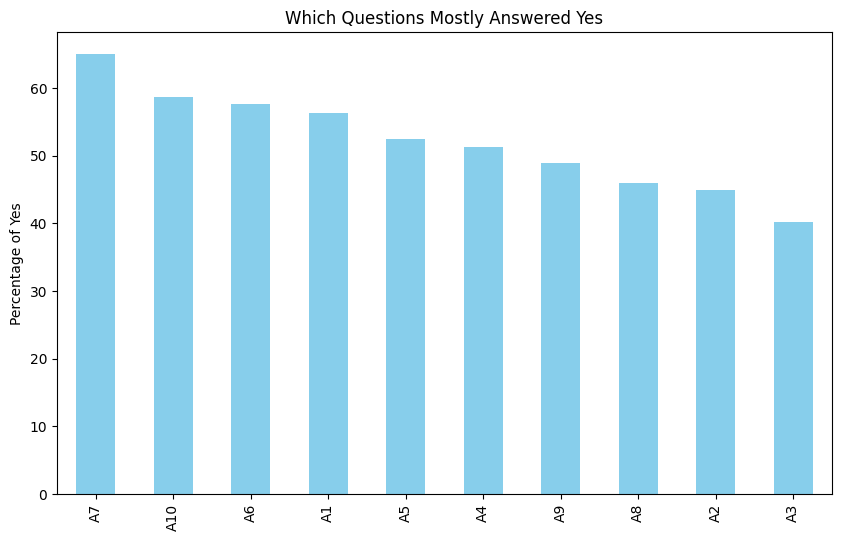

In [32]:
# Suppose A1–A10 questions hai
questions = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10"]

# Percentage of Yes (1) per question
yes_percentage = (v[questions] == 1).mean() * 100  # 1 = Yes

# Sort descending to see which question mostly Yes
yes_percentage = yes_percentage.sort_values(ascending=False)
print(yes_percentage)

# Optional: plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
yes_percentage.plot(kind="bar", color="skyblue")
plt.ylabel("Percentage of Yes")
plt.title("Which Questions Mostly Answered Yes")
plt.show()

# here we can say A7 is mostly answered yes almost 65 percent
            

#                       question A7: 

#          If you or someone else in the family is visibly upset
#        does your child show signs of wan9ng to comfort them?
#         (e.g. stroking hair, hugging them)

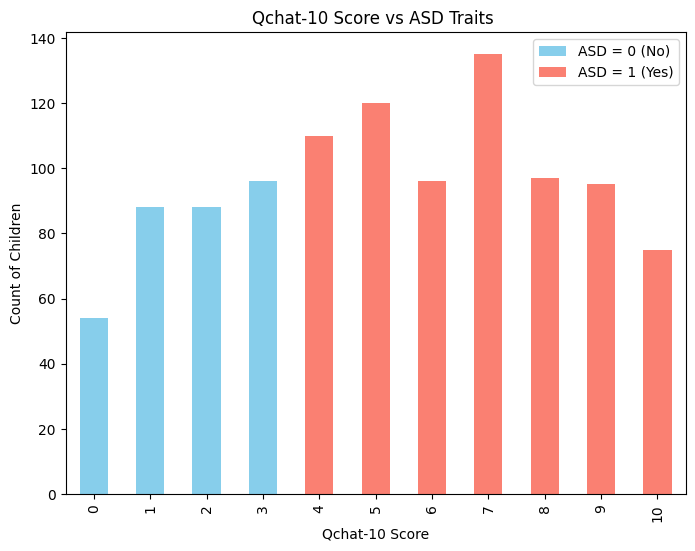

In [33]:
import matplotlib.pyplot as plt

score_relation = v.groupby(["Qchat-10-Score","Class/ASD Traits "]).size().unstack(fill_value=0)

score_relation.plot(kind="bar", stacked=True, figsize=(8,6), color=["skyblue","salmon"])
plt.title("Qchat-10 Score vs ASD Traits ")
plt.xlabel("Qchat-10 Score")
plt.ylabel("Count of Children")
plt.legend(["ASD = 0 (No)", "ASD = 1 (Yes)"])
plt.show()


**those kids who got 4 or more  than 4 ..they are 728 in numbers**

In [34]:
# 4 se upar wale scores filter karo
above_4 = score_relation.loc[score_relation.index >= 4].sum().sum()

print("Total kids with score >= 4:", above_4)


Total kids with score >= 4: 728


**kids who got 4 or more than 4 ...they have the signs of autism traits and 70** **percent got 4 or more than 4 and that all have autism traits**

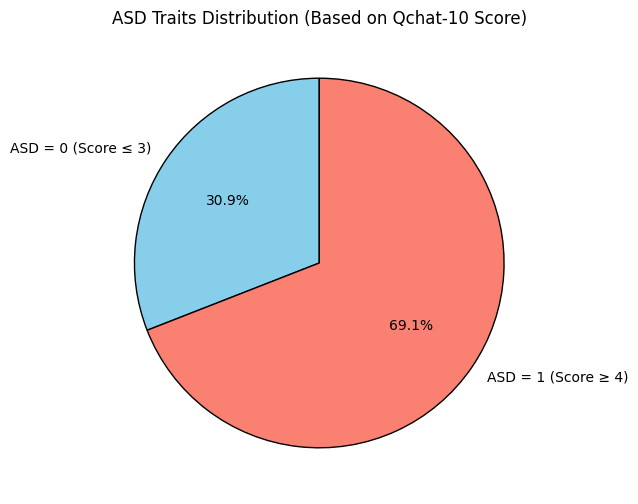

In [35]:
import matplotlib.pyplot as plt

# Data
sizes = [326, 728]
labels = ["ASD = 0 (Score ≤ 3)", "ASD = 1 (Score ≥ 4)"]
colors = ["skyblue", "salmon"]

# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%.1f%%", startangle=90, colors=colors, wedgeprops={'edgecolor':'black'})
plt.title("ASD Traits Distribution (Based on Qchat-10 Score)")
plt.show()


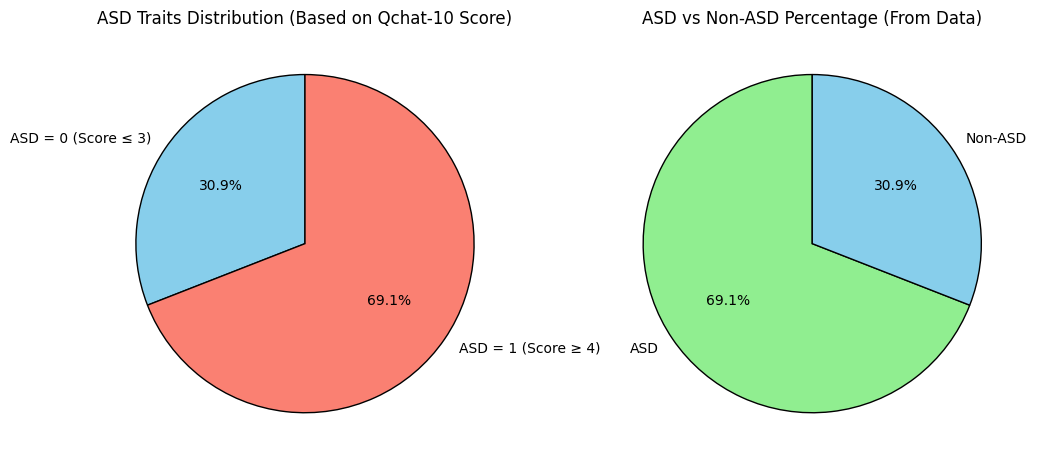

In [36]:

import matplotlib.pyplot as plt

# Data for first chart
sizes = [326, 728]
labels1 = ["ASD = 0 (Score ≤ 3)", "ASD = 1 (Score ≥ 4)"]
colors1 = ["skyblue", "salmon"]

# Data for second chart (from v dataframe)
counts = v["Class/ASD Traits "].value_counts(normalize=True) * 100
counts.index = counts.index.map({0: "Non-ASD", 1: "ASD"})
labels2 = counts.index
sizes2 = counts.values
colors2 = ["lightgreen","skyblue"]

# Plot side by side
plt.figure(figsize=(12,6))

# First pie chart
plt.subplot(1,2,1)
plt.pie(sizes, labels=labels1, autopct="%.1f%%", startangle=90, colors=colors1, wedgeprops={'edgecolor':'black'})
plt.title("ASD Traits Distribution (Based on Qchat-10 Score)")

# Second pie chart
plt.subplot(1,2,2)
plt.pie(sizes2, labels=labels2, autopct="%.1f%%", startangle=90, colors=colors2, wedgeprops={'edgecolor':'black'})
plt.title("ASD vs Non-ASD Percentage (From Data)")

plt.show()

# Feature engineering

In [37]:
corr = v.corr()["Class/ASD Traits "] 

By this correlation we can observe that :
# Family_mem_with_ASD 
#

In [38]:
corr

Case_No                0.079966
A1                     0.503810
A2                     0.463467
A3                     0.409701
A4                     0.505204
A5                     0.563297
A6                     0.569424
A7                     0.563177
A8                     0.427155
A9                     0.577336
A10                    0.179833
Age_Mons               0.066831
Qchat-10-Score         0.810423
Sex                    0.117664
Jaundice               0.074060
Family_mem_with_ASD   -0.013503
Class/ASD Traits       1.000000
Name: Class/ASD Traits , dtype: float64

**By this correlation we can observe that** :
# Family_men_with_ASD 
# case number
# Jaundice 
# Age moms 
**has very weak correlation** .
**so what we  do is to drop these features**
**because if we does not drop**

**1. model will try to find out unnecessary pattern**
**2. model will be overfiited**
**3. may create noise and model may divert**

**Lets drop these irrelevent features**

In [39]:

v_new = v.drop(["Case_No" , "Jaundice" , "Family_mem_with_ASD" , "Age_Mons"] , axis = 1)

In [40]:
v_new

# our cleaned dataset ...

# now we will do train test split for further scaling and 
# traing the model ...

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,3,0,0
1,1,1,0,0,0,1,1,0,0,0,4,1,1
2,1,0,0,0,0,0,1,1,0,1,4,1,1
3,1,1,1,1,1,1,1,1,1,1,10,1,1
4,1,1,0,1,1,1,1,1,1,1,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,1,0,0
1050,0,0,1,1,1,0,1,0,1,0,5,1,1
1051,1,0,1,1,1,1,1,1,1,1,9,1,1
1052,1,0,0,0,0,0,0,1,0,1,3,1,0


**features splitting part started**

In [41]:
# here we are doing splitting
# into the inputs columns and outputs columns.

x = v_new.iloc[: , 0:12]
y = v_new.iloc[: , -1]

In [42]:
x
# inputs features 

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex
0,0,0,0,0,0,0,1,1,0,1,3,0
1,1,1,0,0,0,1,1,0,0,0,4,1
2,1,0,0,0,0,0,1,1,0,1,4,1
3,1,1,1,1,1,1,1,1,1,1,10,1
4,1,1,0,1,1,1,1,1,1,1,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,1,0
1050,0,0,1,1,1,0,1,0,1,0,5,1
1051,1,0,1,1,1,1,1,1,1,1,9,1
1052,1,0,0,0,0,0,0,1,0,1,3,1


In [43]:
y
# output features 

0       0
1       1
2       1
3       1
4       1
       ..
1049    0
1050    1
1051    1
1052    0
1053    1
Name: Class/ASD Traits , Length: 1054, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.1)

In [45]:
x_test
# selected 20 percent rows  from inputs to 
# predict futher

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex
558,0,0,0,0,0,1,1,0,0,0,2,0
1014,1,0,0,0,0,1,1,1,1,0,5,0
535,0,0,0,0,0,0,0,1,0,0,1,1
219,0,1,1,1,1,1,1,1,0,1,8,1
250,1,1,0,1,1,1,1,1,1,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
744,1,1,1,1,1,1,1,0,1,1,9,1
1051,1,0,1,1,1,1,1,1,1,1,9,1
481,1,1,1,1,1,1,1,1,1,1,10,1
291,1,0,0,1,1,0,1,0,1,1,6,1


In [46]:
y_test
# selected 20 percent rows  from outputs to 
# predict futher ...

558     0
1014    1
535     0
219     1
250     1
       ..
744     1
1051    1
481     1
291     1
392     1
Name: Class/ASD Traits , Length: 106, dtype: int64

**Scaling  part  started**

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()


**Since only questions _ score part is dominating
others are in binary.. so we will do scaling
only of question score parts**

In [49]:
x_train_scaled = scaler.fit_transform(x_train[["Qchat-10-Score"]])

In [50]:
x_train.shape

(948, 12)

In [51]:
import pandas as pd

x_train_scaled_v = pd.DataFrame(
    x_train_scaled,               # numpy array
    columns=["Qchat-10-Score"],   # column name
    index=x_train.index           # same index as original DataFrame
)


In [52]:
x_train_binary = x_train.drop(columns=["Qchat-10-Score"])


In [53]:
x_train_final = pd.concat([x_train_binary, x_train_scaled_v], axis=1)

print(x_train_final.head())

# now finally we  succesfully scaled our score columns
# dropped original score column 
# and again included scaled score colum in our datsets

      A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Sex  Qchat-10-Score
974    1   0   0   0   0   0   1   1   1    1    1       -0.070961
816    1   0   0   0   1   0   1   1   1    0    1       -0.070961
929    0   0   1   1   1   0   0   0   1    0    1       -0.414183
1031   1   1   0   0   0   1   1   1   0    1    0        0.272260
379    1   0   0   0   0   0   1   0   0    1    0       -0.757404


**scaling x_test data**

In [54]:
x_test_scaled = scaler.transform(x_test[["Qchat-10-Score"]])

In [55]:
x_test_scaled.shape

(106, 1)

In [56]:
#   here we are converting numpy array into dataframe .

In [57]:
x_test_scaled_v = pd.DataFrame(
    x_test_scaled,               # numpy array
    columns=["Qchat-10-Score"],   # column name
    index=x_test.index           # same index as original DataFrame
)


In [58]:
# here we are dropping  original question score
# from the dataframe .

x_test_binary = x_test.drop(columns=["Qchat-10-Score"])

In [59]:
# here we are concatting scaled and original dataframe.
x_test_final = pd.concat([x_test_binary, x_test_scaled_v], axis=1)

print(x_test_final.head()) 

      A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Sex  Qchat-10-Score
558    0   0   0   0   0   1   1   0   0    0    0       -1.100625
1014   1   0   0   0   0   1   1   1   1    0    0       -0.070961
535    0   0   0   0   0   0   0   1   0    0    1       -1.443847
219    0   1   1   1   1   1   1   1   0    1    1        0.958703
250    1   1   0   1   1   1   1   1   1    1    1        1.301924


# Model training part has started by Logistic regression

**Training  part  has started from here**

In [60]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [61]:
# model training 
clf.fit(x_train_final , y_train)

LogisticRegression()

In [62]:
y_pred = clf.predict(x_test_final)

In [63]:
y_test

558     0
1014    1
535     0
219     1
250     1
       ..
744     1
1051    1
481     1
291     1
392     1
Name: Class/ASD Traits , Length: 106, dtype: int64

In [64]:
from sklearn.metrics import accuracy_score

# Got accuracy of 100 perecnt 

In [65]:
accuracy_score(y_test , y_pred)*100

100.0

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_final, y_train)

y_pred_rf = rf.predict(x_test_final)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Accuracy: 1.0


In [67]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(rf, x_train_final, y_train, cv=5)
print("Cross-validation accuracy mean:", np.mean(scores))
print("All fold scores:", scores)


Cross-validation accuracy mean: 1.0
All fold scores: [1. 1. 1. 1. 1.]
